# <center> Competition to Correctly Tag the SuperHeroes 

In [1]:
#import various packages
import os
import numpy as np
import pandas as pd
#import scipy
#import sklearn
import cv2
from skimage import io
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #check pip- version
# pip -V

# # install opencv
# pip install opencv-python

#conda install keras
# !pip install tensorflow
# import keras

In [3]:
os.listdir('./Ant-Man')

['cax_antman_train1.jpg',
 'cax_antman_train10.jpg',
 'cax_antman_train11.jpg',
 'cax_antman_train2.jpeg',
 'cax_antman_train241.jpg',
 'cax_antman_train3.jpg',
 'cax_antman_train4.jpeg',
 'cax_antman_train5.jpg',
 'cax_antman_train6.jpg',
 'cax_antman_train7.jpg',
 'cax_antman_train8.jpg',
 'cax_antman_train9.jpg']

In [4]:
#Defining the File Path

# Ant man
ant=os.listdir('./Ant-Man')

# Aqua man
aqua=os.listdir("./Aquaman")

antpath="./Ant-Man/"
aquapath="./Aquaman/"

In [5]:
ant

['cax_antman_train1.jpg',
 'cax_antman_train10.jpg',
 'cax_antman_train11.jpg',
 'cax_antman_train2.jpeg',
 'cax_antman_train241.jpg',
 'cax_antman_train3.jpg',
 'cax_antman_train4.jpeg',
 'cax_antman_train5.jpg',
 'cax_antman_train6.jpg',
 'cax_antman_train7.jpg',
 'cax_antman_train8.jpg',
 'cax_antman_train9.jpg']

In [6]:
ant[0]

'cax_antman_train1.jpg'

In [7]:
#Loading the Images For Ant-Man
ant_images=[]
for i in ant:
    image = imageio.imread(antpath+i)
    if((image.shape)[2]==3) :
        ant_images.append(image)

In [8]:
#Loading the Images For Aqua-Man
aqua_images=[]
for i in aqua:
    image = imageio.imread(aquapath+i)
    if((image.shape)[2]==3) :
        aqua_images.append(image)

In [9]:
# data Type of image holder
type(ant_images)

list

In [10]:
# Number of Images 
len(ant_images)

12

In [11]:
ant_images[0]

Array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [12]:
type(ant_images[0])

imageio.core.util.Array

In [13]:
# Dimension of 1st Image
ant_images[0].shape

(216, 233, 3)

In [14]:
# Appending images for all the super-hoeroes
images=[]
images=ant_images+aqua_images

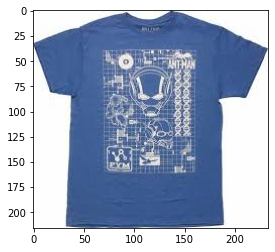

In [15]:
# Plot window
plt.ion()
plt.interactive(True)
plt.imshow(images[0])
plt.show()

In [16]:
# Steps to standardized the images

# Max value of x-axis
x_axis=[]
img_len=len(images)
for i in range(0,img_len):
    x_axis.append((images[i].shape)[0])

x_axis=np.array(x_axis)
print('Max Value for X- Axis is - ',x_axis.max())


# Max value of y-axis
y_axis=[]
img_len=len(images)
for i in range(0,img_len):
    y_axis.append((images[i].shape)[1])

y_axis=np.array(y_axis)
print('Max Value for Y- Axis is - ',y_axis.max())

Max Value for X- Axis is -  250
Max Value for Y- Axis is -  233


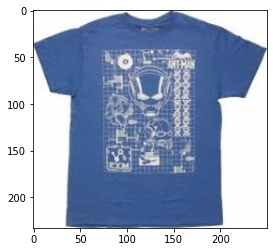

In [17]:
#resizing all the images
images_rs=images.copy()
for i in range(0,len(images)):
    images_rs[i]=cv2.resize(images[i],(250,233))

plt.imshow(images_rs[0])
plt.show()

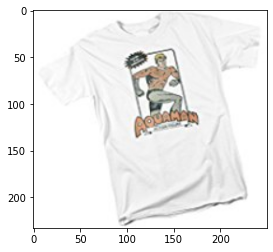

In [18]:
plt.imshow(images_rs[20])
plt.show()

In [19]:
#converting images to arrays
images_rs_ar=images_rs[0]
for i in range(1,len(images_rs)):
    images_rs_ar=np.concatenate((images_rs_ar, images_rs[i]))


images_rs_ar=images_rs_ar.reshape(-1,250,233,3)

images_rs_ar.shape

(23, 250, 233, 3)

In [20]:
# Assigning labels to each image class

# Create label variable - Dummy variables
label=np.concatenate((np.zeros(len(ant_images)),np.ones(len(aqua_images))),axis=0)
print('Number of Labels are - ',len(label))

#Converting the target variable to the required format
from keras.utils.np_utils import to_categorical
label = to_categorical(label)
print('Printing the labels value - ',label)

Number of Labels are -  23
Printing the labels value -  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
